In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import pathlib
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import holidays

df = pd.DataFrame()
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z')

df = pd.read_csv('Austria.csv', index_col=0, parse_dates=['Start'], date_parser=dateparse)

df['Date'] = df['Start'].dt.date
df['Time'] = df['Start'].dt.time
df['Year'] = df['Start'].dt.year
df['Month'] = df['Start'].dt.month
df['Day'] = df['Start'].dt.day
df['Hour'] = df['Start'].dt.hour
df['Minute'] = df['Start'].dt.minute
# df['Second'] = df['Start'].second
df["Weekday"] = df['Start'].dt.weekday
df["Weekend"] = df['Start'].dt.weekday >= 5
df['Holiday'] = df['Start'].dt.date.astype('datetime64').isin(calendar().holidays())

df.loc[df['Holiday']==True]

Start    Load   Price        Date      Time  Year  \
4324   2015-05-25 00:00:00+00:00  4346.0   30.34  2015-05-25  00:00:00  2015   
4325   2015-05-25 00:15:00+00:00  4306.0   16.35  2015-05-25  00:15:00  2015   
4326   2015-05-25 00:30:00+00:00  4212.0   13.10  2015-05-25  00:30:00  2015   
4327   2015-05-25 00:45:00+00:00  4229.0   13.03  2015-05-25  00:45:00  2015   
4328   2015-05-25 01:00:00+00:00  4060.0   26.02  2015-05-25  01:00:00  2015   
...                          ...     ...     ...         ...       ...   ...   
135068 2022-02-21 19:00:00+00:00  9156.0  169.96  2022-02-21  19:00:00  2022   
135069 2022-02-21 20:00:00+00:00  8922.0  150.38  2022-02-21  20:00:00  2022   
135070 2022-02-21 21:00:00+00:00  8458.0  126.38  2022-02-21  21:00:00  2022   
135071 2022-02-21 22:00:00+00:00  7875.0  121.53  2022-02-21  22:00:00  2022   
135072 2022-02-21 23:00:00+00:00  7620.0  114.04  2022-02-21  23:00:00  2022   

        Month  Day  Hour  Minute  Weekday  Weekend  Holiday  
4324        5   25     0       0        0    False     True  
4325        5   25     0      15        0    False     True  
4326        5   25     0      30        0    False     True  
4327        5   25     0      45        0    False     True  
4328        5   25     1       0        0    False     True  
...       ...  ...   ...     ...      ...      ...      ...  
135068      2   21    19       0        0    False     True  
135069      2   21    20       0        0    False     True  
135070      2   21    21       0        0    False     True  
135071      2   21    22       0        0    False     True  
135072      2   21    23       0        0    False     True  

[3792 rows x 13 columns]

In [3]:
# list(df.columns):
print("NaN values in dataframe: "+str(df.isnull().sum().sum()))

NaN values in dataframe: 0


In [4]:
# Basic statistics of dataset
df.describe()

Load          Price           Year          Month  \
count  135987.000000  135987.000000  135987.000000  135987.000000   
mean     7134.349430      40.896347    2017.112592       6.520984   
std      1412.044294      39.508013       1.830562       3.490236   
min       615.000000    -102.630000    2015.000000       1.000000   
25%      6014.000000      24.660000    2016.000000       3.000000   
50%      7103.000000      34.000000    2017.000000       7.000000   
75%      8146.000000      44.730000    2018.000000      10.000000   
max     10836.000000     700.000000    2022.000000      12.000000   

                 Day           Hour         Minute        Weekday  
count  135987.000000  135987.000000  135987.000000  135987.000000  
mean       15.727003      11.499923      17.424607       2.999743  
std         8.799291       6.922335      17.499902       2.001123  
min         1.000000       0.000000       0.000000       0.000000  
25%         8.000000       5.000000       0.000000       1.000000  
50%        16.000000      11.000000      15.000000       3.000000  
75%        23.000000      17.500000      30.000000       5.000000  
max        31.000000      23.000000      45.000000       6.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135987 entries, 0 to 135986
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype              
---  ------   --------------   -----              
 0   Start    135987 non-null  datetime64[ns, UTC]
 1   Load     135987 non-null  float64            
 2   Price    135987 non-null  float64            
 3   Date     135987 non-null  object             
 4   Time     135987 non-null  object             
 5   Year     135987 non-null  int64              
 6   Month    135987 non-null  int64              
 7   Day      135987 non-null  int64              
 8   Hour     135987 non-null  int64              
 9   Minute   135987 non-null  int64              
 10  Weekday  135987 non-null  int64              
 11  Weekend  135987 non-null  bool               
 12  Holiday  135987 non-null  bool               
dtypes: bool(2), datetime64[ns, UTC](1), float64(2), int64(6), object(2)
memory usage: 12.7+ MB


<AxesSubplot:xlabel='Start'>

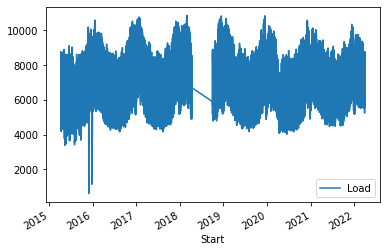

In [6]:
df.plot(x='Start',y='Load')

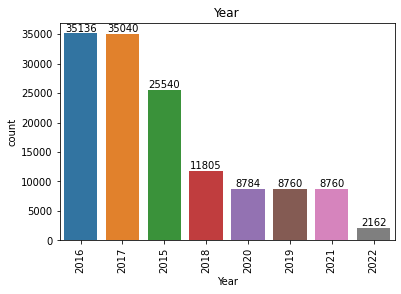

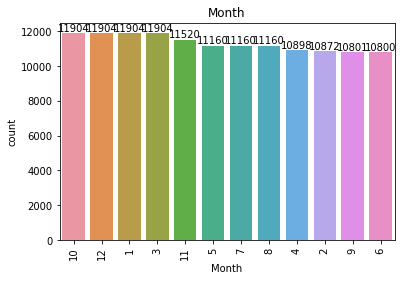

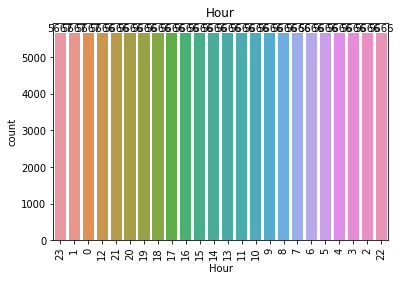

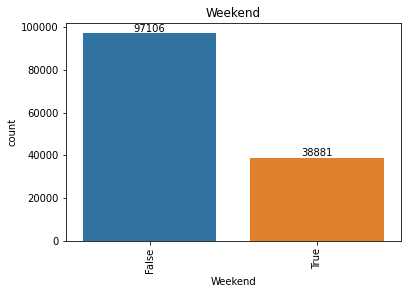

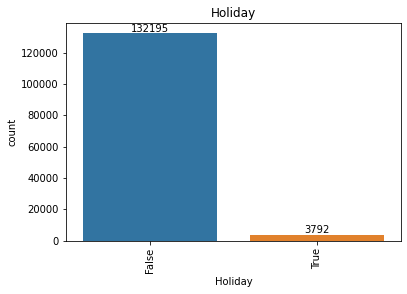

In [7]:
# create a count plot for the columns in for loop
# Countplot: histogram across a categorical (limited possible values), instead of quantitative, variable

for col in ['Year', 'Month', 'Hour','Weekend', 'Holiday']:
    ax = sns.countplot(x=df[col],order = df[col].value_counts().index)
    abs_values = df[col].value_counts(ascending=False).values
    ax.bar_label(ax.containers[0], labels=abs_values)
    plt.title(col)
    plt.xticks(x=abs_values, rotation=90)
    plt.show()

(5000.0, 7000.0)

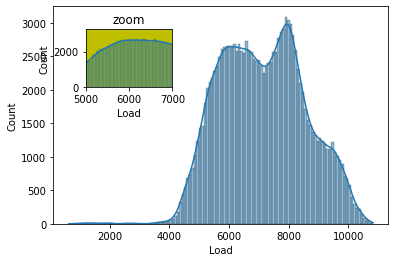

In [8]:
fig, ax = plt.subplots()
sns.histplot(data=df['Load'], kde=True)

ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.histplot(data=df['Load'], kde=True, ax=ax2)

ax2.set_title('zoom')
ax2.set_xlim([5000,7000])


<AxesSubplot:xlabel='Load'>

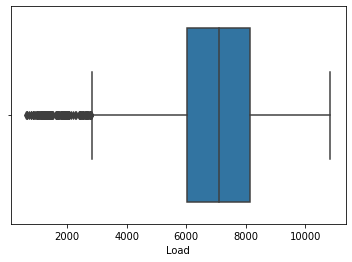

In [9]:
sns.boxplot(x=df['Load'])

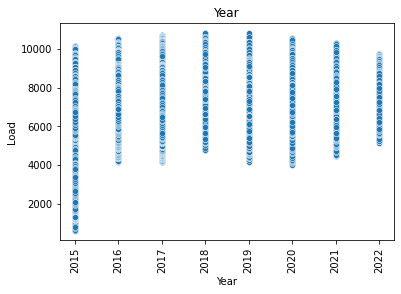

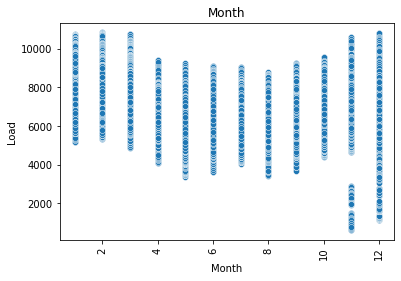

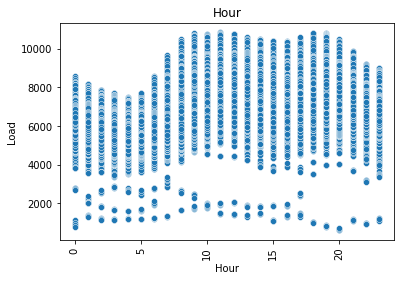

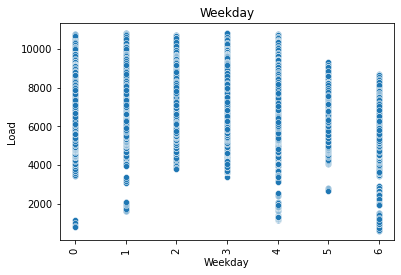

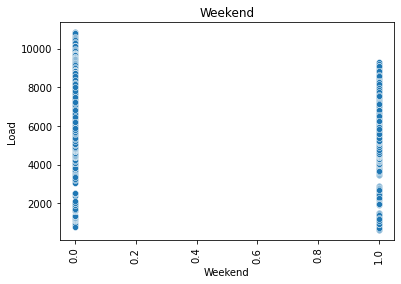

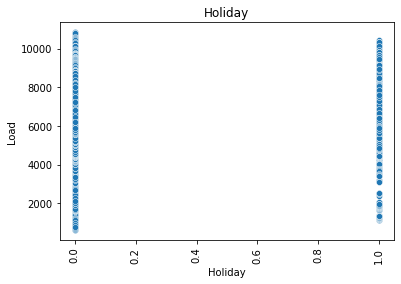

In [10]:
for col in ['Year', 'Month', 'Hour', 'Weekday', 'Weekend', 'Holiday']:
    sns.scatterplot(x=df[col], y=df['Load'])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:xlabel='Holiday'>

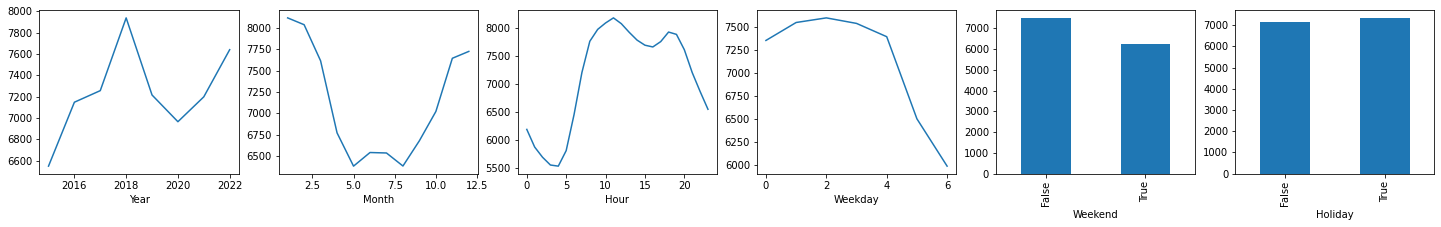

In [11]:
fig, axes = plt.subplots(1, 6)
df.groupby('Year')['Load'].mean().plot(ax=axes[0], figsize=(25, 3))
df.groupby('Month')['Load'].mean().plot(ax=axes[1], figsize=(25, 3))
df.groupby('Hour')['Load'].mean().plot(ax=axes[2], figsize=(25, 4))
df.groupby('Weekday')['Load'].mean().plot(ax=axes[3], figsize=(25, 3))
df.groupby('Weekend')['Load'].mean().plot.bar(ax=axes[4], figsize=(25, 3))
df.groupby('Holiday')['Load'].mean().plot.bar(ax=axes[5], figsize=(25, 3))

In [12]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.metrics import mape, mase
from darts import TimeSeries

df['Start'] = pd.to_datetime(df['Start']).dt.tz_localize(None)
series = TimeSeries.from_dataframe(df, time_col='Start', 
                                   value_cols='Load', 
                                   fill_missing_dates=True, freq='15T')
series

<TimeSeries (DataArray) (Start: 244617, component: 1, sample: 1)>
array([[[6401.]],

       [[6224.]],

       [[6187.]],

       ...,

       [[  nan]],

       [[  nan]],

       [[6206.]]])
Coordinates:
  * Start      (Start) datetime64[ns] 2015-04-09T23:00:00 ... 2022-04-01T01:0...
  * component  (component) object 'Load'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

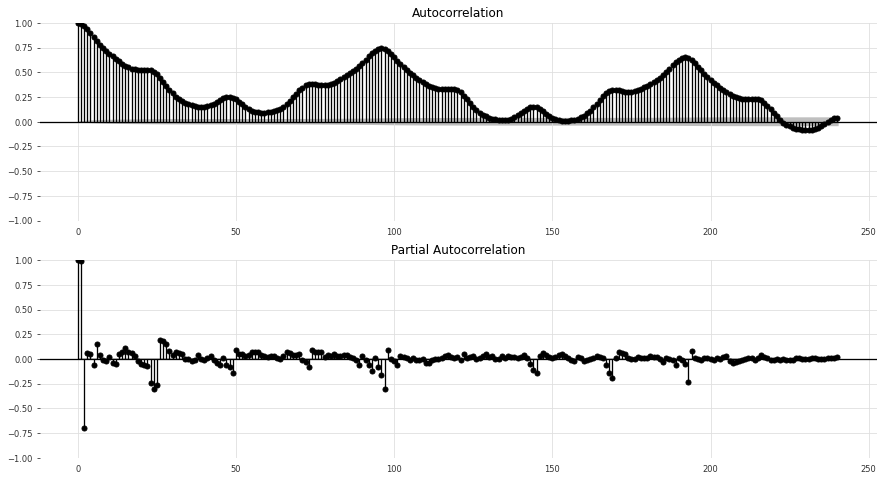

In [13]:
import statsmodels.api as sm

fig, ax = plt.subplots(2,1, figsize=(15, 8))
fig = sm.graphics.tsa.plot_acf(df['Load'], lags=24*10, ax=ax[0],alpha=0.05)
fig = sm.graphics.tsa.plot_pacf(df['Load'], lags=24*10, ax=ax[1],method='ywm',alpha=0.05)
plt.show()

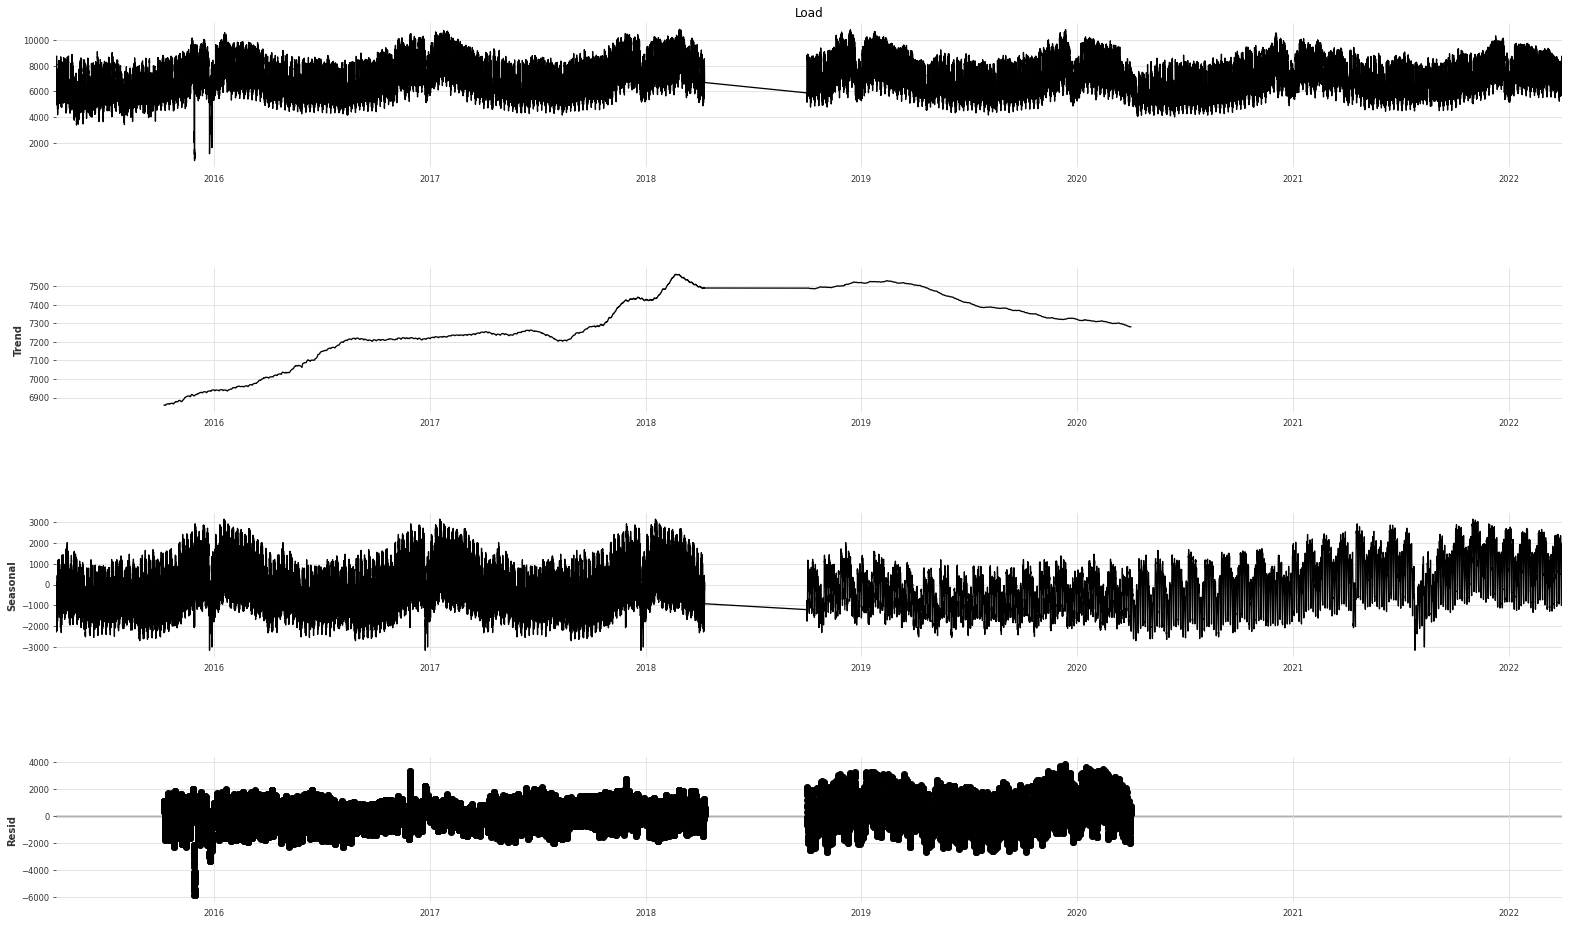

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

df_seasonal = df.set_index('Start') #set as index of dataset the datetime column

result = seasonal_decompose(df_seasonal['Load'],  model='additive', period=365*48*2)
f = result.plot()
f.set_figheight(15)
f.set_figwidth(25)
plt.show()

<AxesSubplot:>

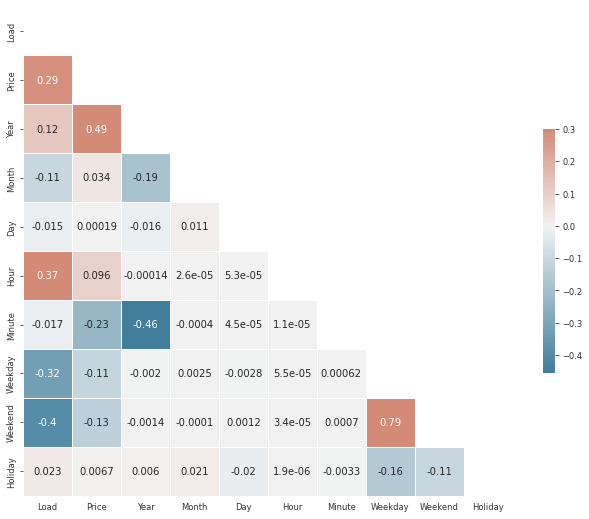

In [16]:
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
# When we run this cell the report process will be kicked off and 
# analyse all of your data within the dataframe

# https://towardsdatascience.com/pandas-profiling-easy-exploratory-data-analysis-in-python-65d6d0e23650
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]